In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
import warnings
warnings.filterwarnings("ignore") # ignoring wranings
# it is imporat when we are done with project otherwise do not call this and try to understand the warnings.
### Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.preprocessing import LabelEncoder

In [87]:
df_raw = pd.read_csv('E:/downloads/corona_tested_006.csv')

# Exploratory Data Analysis

In [88]:
df_raw.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [89]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [90]:
df_raw.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [91]:
df_raw.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [92]:
 df_raw = df_raw.replace({True:"TRUE",False:"FALSE"})

In [93]:
df_raw.Cough_symptoms.unique()

array(['TRUE', 'FALSE', 'None'], dtype=object)

In [94]:
df_raw.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              3
Fever                       3
Sore_throat                 3
Shortness_of_breath         3
Headache                    3
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [95]:
# verifying unique values in each column
for column in df_raw.columns:
    if column not in ["Test_date","Ind_ID"]:
        print(f"unique values in {column} : {df_raw[column].unique()}")

unique values in Cough_symptoms : ['TRUE' 'FALSE' 'None']
unique values in Fever : ['FALSE' 'TRUE' 'None']
unique values in Sore_throat : ['TRUE' 'FALSE' 'None']
unique values in Shortness_of_breath : ['FALSE' 'TRUE' 'None']
unique values in Headache : ['FALSE' 'TRUE' 'None']
unique values in Corona : ['negative' 'positive' 'other']
unique values in Age_60_above : ['None' 'No' 'Yes']
unique values in Sex : ['None' 'male' 'female']
unique values in Known_contact : ['Abroad' 'Contact with confirmed' 'Other']


<AxesSubplot:xlabel='Cough_symptoms', ylabel='Count'>

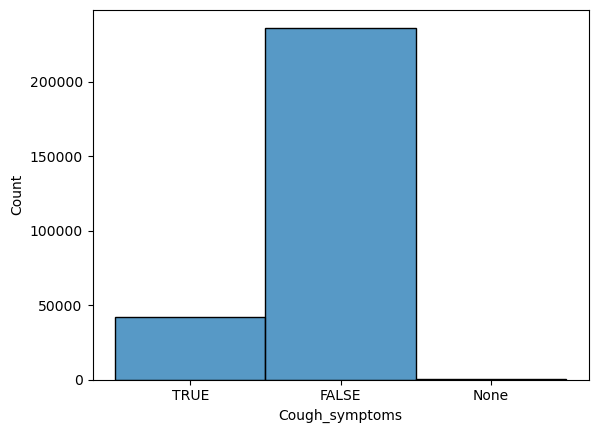

In [96]:
sns.histplot(df_raw['Cough_symptoms'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

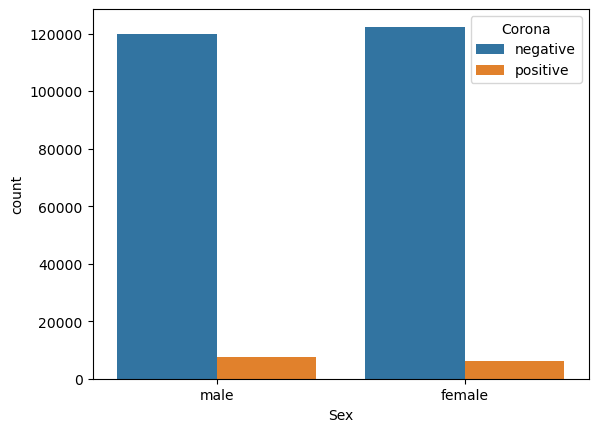

In [102]:
sns.countplot(df['Sex'],hue = df['Corona'])

<AxesSubplot:xlabel='Cough_symptoms', ylabel='count'>

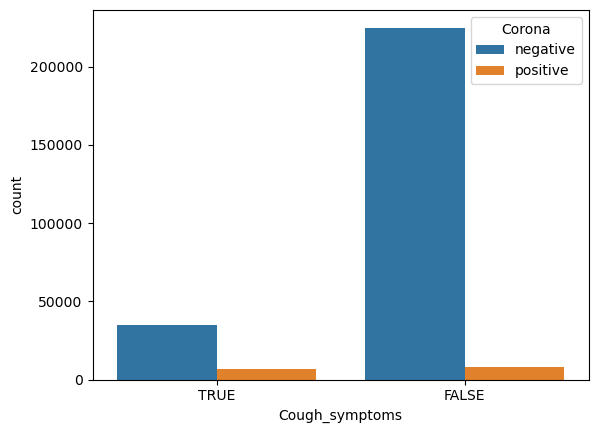

In [103]:
sns.countplot(df['Cough_symptoms'],hue = df['Corona'])

<AxesSubplot:xlabel='Fever', ylabel='count'>

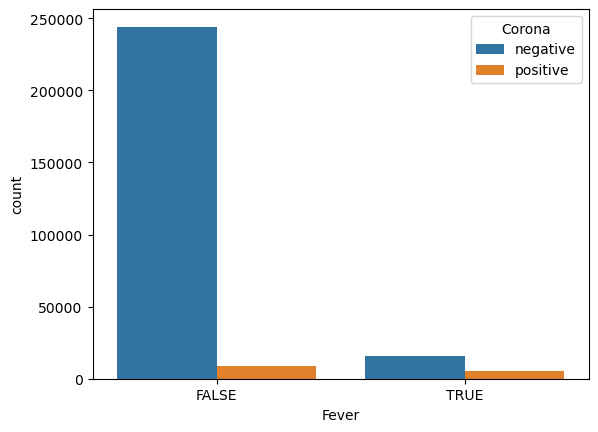

In [104]:
sns.countplot(df['Fever'],hue = df['Corona'])

<AxesSubplot:xlabel='Age_60_above', ylabel='count'>

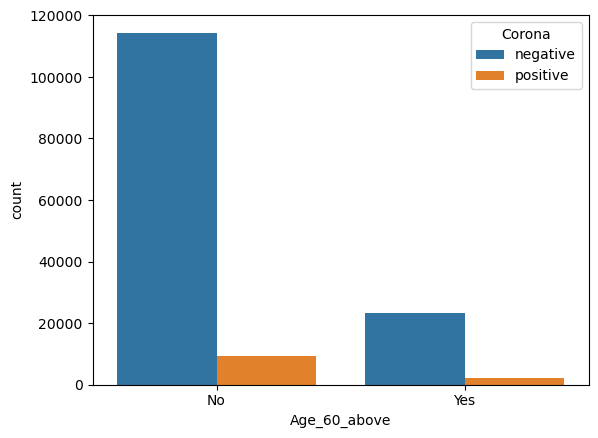

In [106]:
sns.countplot(df['Age_60_above'],hue = df['Corona'])

In [30]:
df_raw = df_raw.replace({'None':np.nan})

In [31]:
df_raw.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           125659
Sex                     19034
Known_contact               0
dtype: int64

In [32]:
df_raw = df_raw.dropna(subset = ['Sore_throat','Shortness_of_breath','Headache','Cough_symptoms','Fever'])

In [33]:
df_raw.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           125659
Sex                     19034
Known_contact               0
dtype: int64

In [34]:
index = df_raw[(df_raw['Corona']=='other')].index
df_raw.drop(index,inplace = True)

In [35]:
df_raw.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           125659
Sex                     19034
Known_contact               0
dtype: int64

In [37]:
def show(data):
  for i in data.columns[2:]:
    print("Feature: {} with {} Levels".format(i,data[i].unique()))

show(df_raw)
df = df_raw.copy()

Feature: Cough_symptoms with ['TRUE' 'FALSE'] Levels
Feature: Fever with ['FALSE' 'TRUE'] Levels
Feature: Sore_throat with ['TRUE' 'FALSE'] Levels
Feature: Shortness_of_breath with ['FALSE' 'TRUE'] Levels
Feature: Headache with ['FALSE' 'TRUE'] Levels
Feature: Corona with ['negative' 'positive'] Levels
Feature: Age_60_above with [nan 'No' 'Yes'] Levels
Feature: Sex with [nan 'male' 'female'] Levels
Feature: Known_contact with ['Abroad' 'Contact with confirmed' 'Other'] Levels


In [28]:
df_raw = df.copy()

In [38]:
# label encoding
df_raw['Cough_symptoms'] = df_raw['Cough_symptoms'].map({'FALSE': 0, 'TRUE': 1})
df_raw['Fever'] = df_raw['Fever'].map({'FALSE': 0, 'TRUE': 1})
df_raw['Sore_throat'] = df_raw['Sore_throat'].map({'FALSE': 0, 'TRUE': 1})
df_raw['Shortness_of_breath'] = df_raw['Shortness_of_breath'].map({'FALSE': 0, 'TRUE': 1})
df_raw['Headache'] = df_raw['Headache'].map({'FALSE': 0, 'TRUE': 1})
df_raw['Corona'] = df_raw['Corona'].map({'negative': 0, 'positive': 1})
df_raw['Sex'] = df_raw['Sex'].map({'female': 0, 'male': 1})
df_raw['Age_60_above'] = df_raw['Age_60_above'].map({'No': 0, 'Yes': 1})

In [39]:
df_raw.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,NaN,NaN,Abroad
1,2,11-03-2020,0,1,0,0,0,1,NaN,NaN,Abroad
2,3,11-03-2020,0,1,0,0,0,1,NaN,NaN,Abroad
3,4,11-03-2020,1,0,0,0,0,0,NaN,NaN,Abroad
4,5,11-03-2020,1,0,0,0,0,0,NaN,NaN,Contact with confirmed


In [40]:
df_raw.isnull().sum()


Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           125659
Sex                     19034
Known_contact               0
dtype: int64

In [120]:
df_raw["Corona"].isnull().sum()


3892

In [41]:
# removing null values from target variable
df_raw = df_raw.dropna(subset = "Corona")
df_raw["Corona"].isnull().sum()

0

In [42]:
# onehotencoding

df_raw['Known_contact'] = df_raw['Known_contact'].map({'Contact with confirmed':'contact_with_confirmed','Abroad':'abroad','Other':'other'})

In [43]:
df_raw  = pd.get_dummies(df_raw,columns = ['Known_contact'])

In [44]:
df_raw

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact_abroad,Known_contact_contact_with_confirmed,Known_contact_other
0,1,11-03-2020,1,0,1,0,0,0,NaN,NaN,1,0,0
1,2,11-03-2020,0,1,0,0,0,1,NaN,NaN,1,0,0
2,3,11-03-2020,0,1,0,0,0,1,NaN,NaN,1,0,0
3,4,11-03-2020,1,0,0,0,0,0,NaN,NaN,1,0,0
4,5,11-03-2020,1,0,0,0,0,0,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,0,0,0,0,0,1,NaN,1.0,0,0,1
278844,278845,30-04-2020,0,0,0,0,0,0,NaN,0.0,0,0,1
278845,278846,30-04-2020,0,0,0,0,0,0,NaN,1.0,0,0,1
278846,278847,30-04-2020,0,0,0,0,0,0,NaN,1.0,0,0,1


In [45]:
data = df_raw.copy()

In [46]:
data.rename({'Known_contact_abroad':'abroad','Known_contact_contact_with_confirmed':'Contact_with_positive_pat'},
           axis = 'columns',inplace = True)

In [47]:
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,abroad,Contact_with_positive_pat,Known_contact_other
0,1,11-03-2020,1,0,1,0,0,0,NaN,NaN,1,0,0
1,2,11-03-2020,0,1,0,0,0,1,NaN,NaN,1,0,0
2,3,11-03-2020,0,1,0,0,0,1,NaN,NaN,1,0,0
3,4,11-03-2020,1,0,0,0,0,0,NaN,NaN,1,0,0
4,5,11-03-2020,1,0,0,0,0,0,NaN,NaN,0,1,0


In [48]:
data.drop(['Known_contact_other','Test_date','Ind_ID'],axis = 1,inplace = True)

In [49]:
import missingno as msno

<AxesSubplot:>

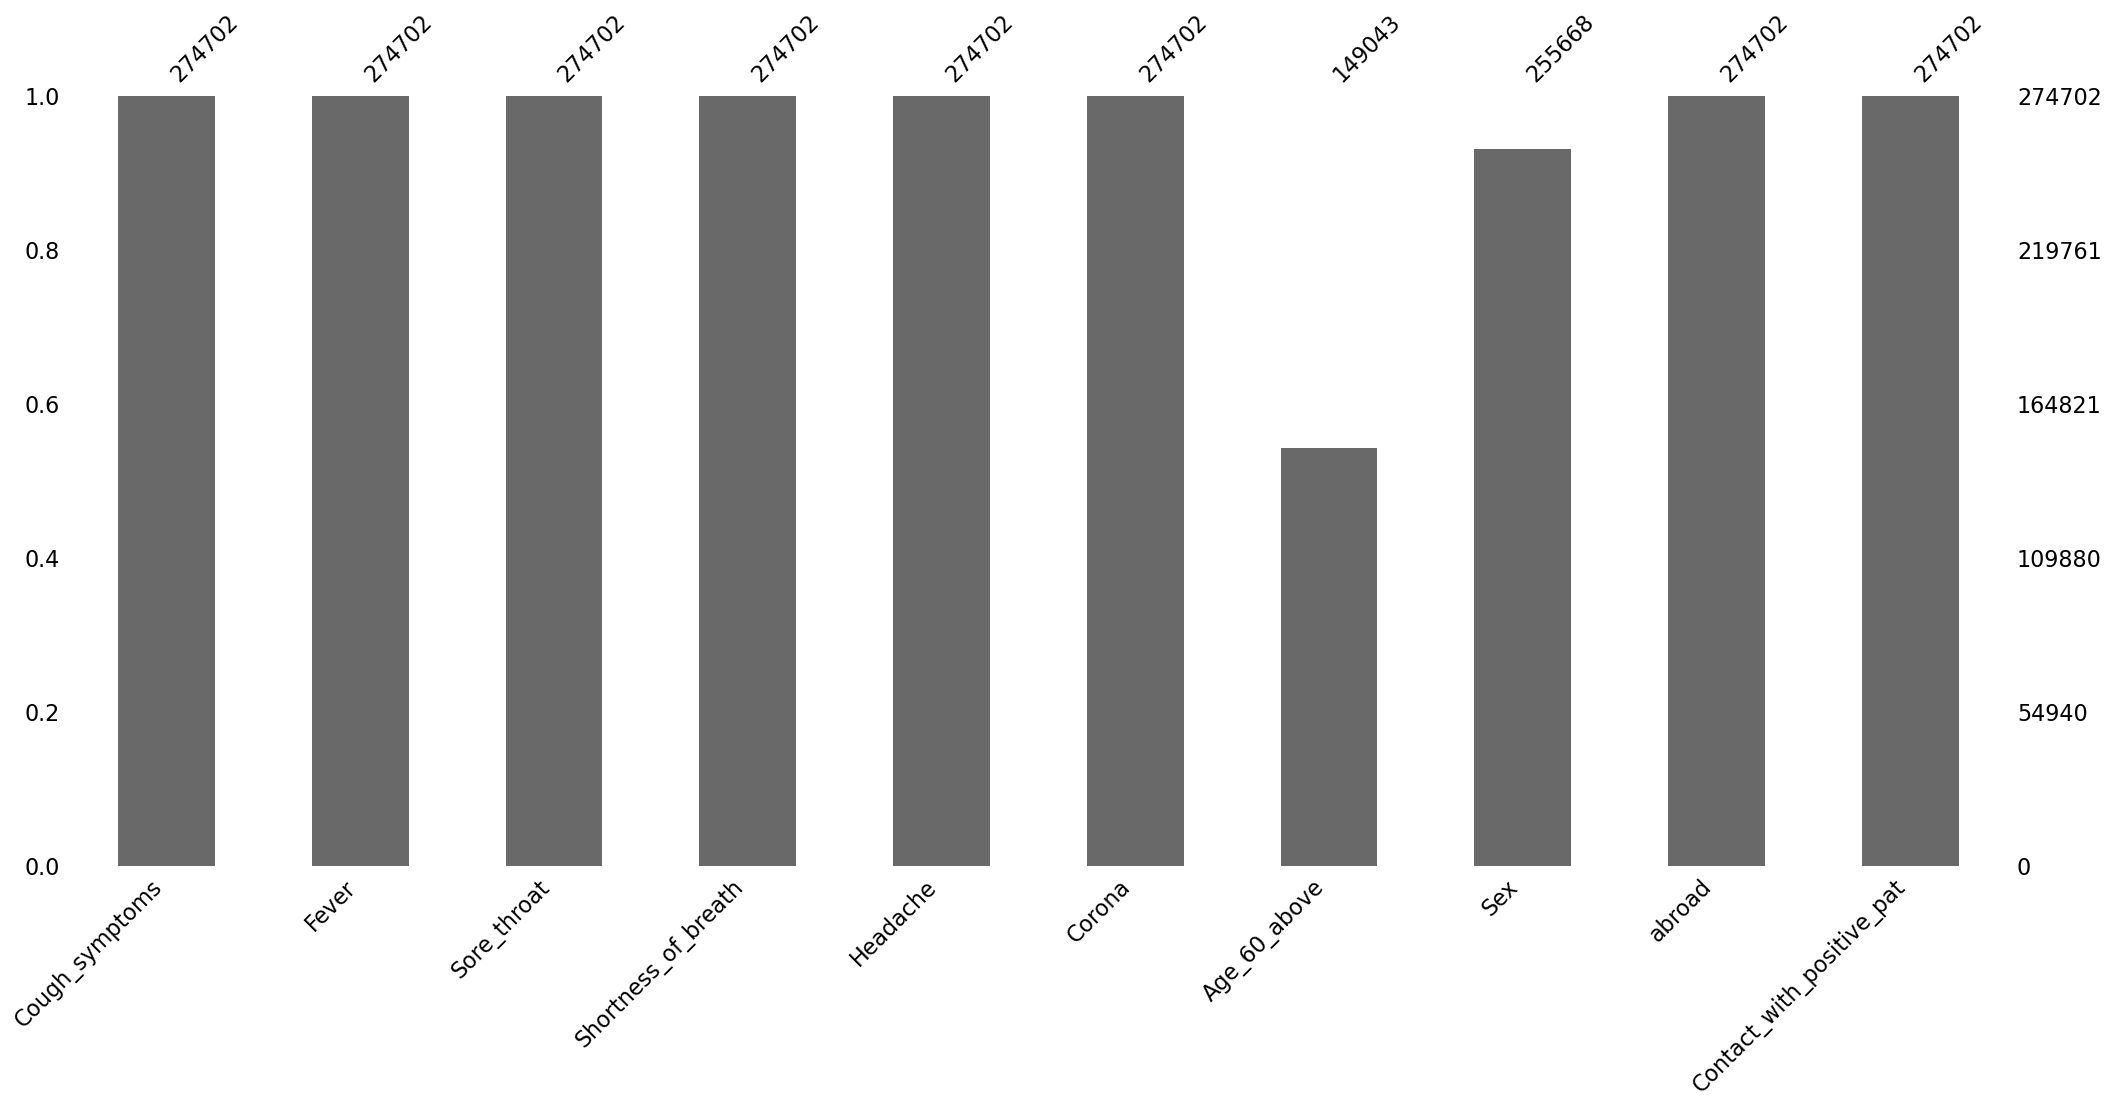

In [50]:
msno.bar(data)

<AxesSubplot:>

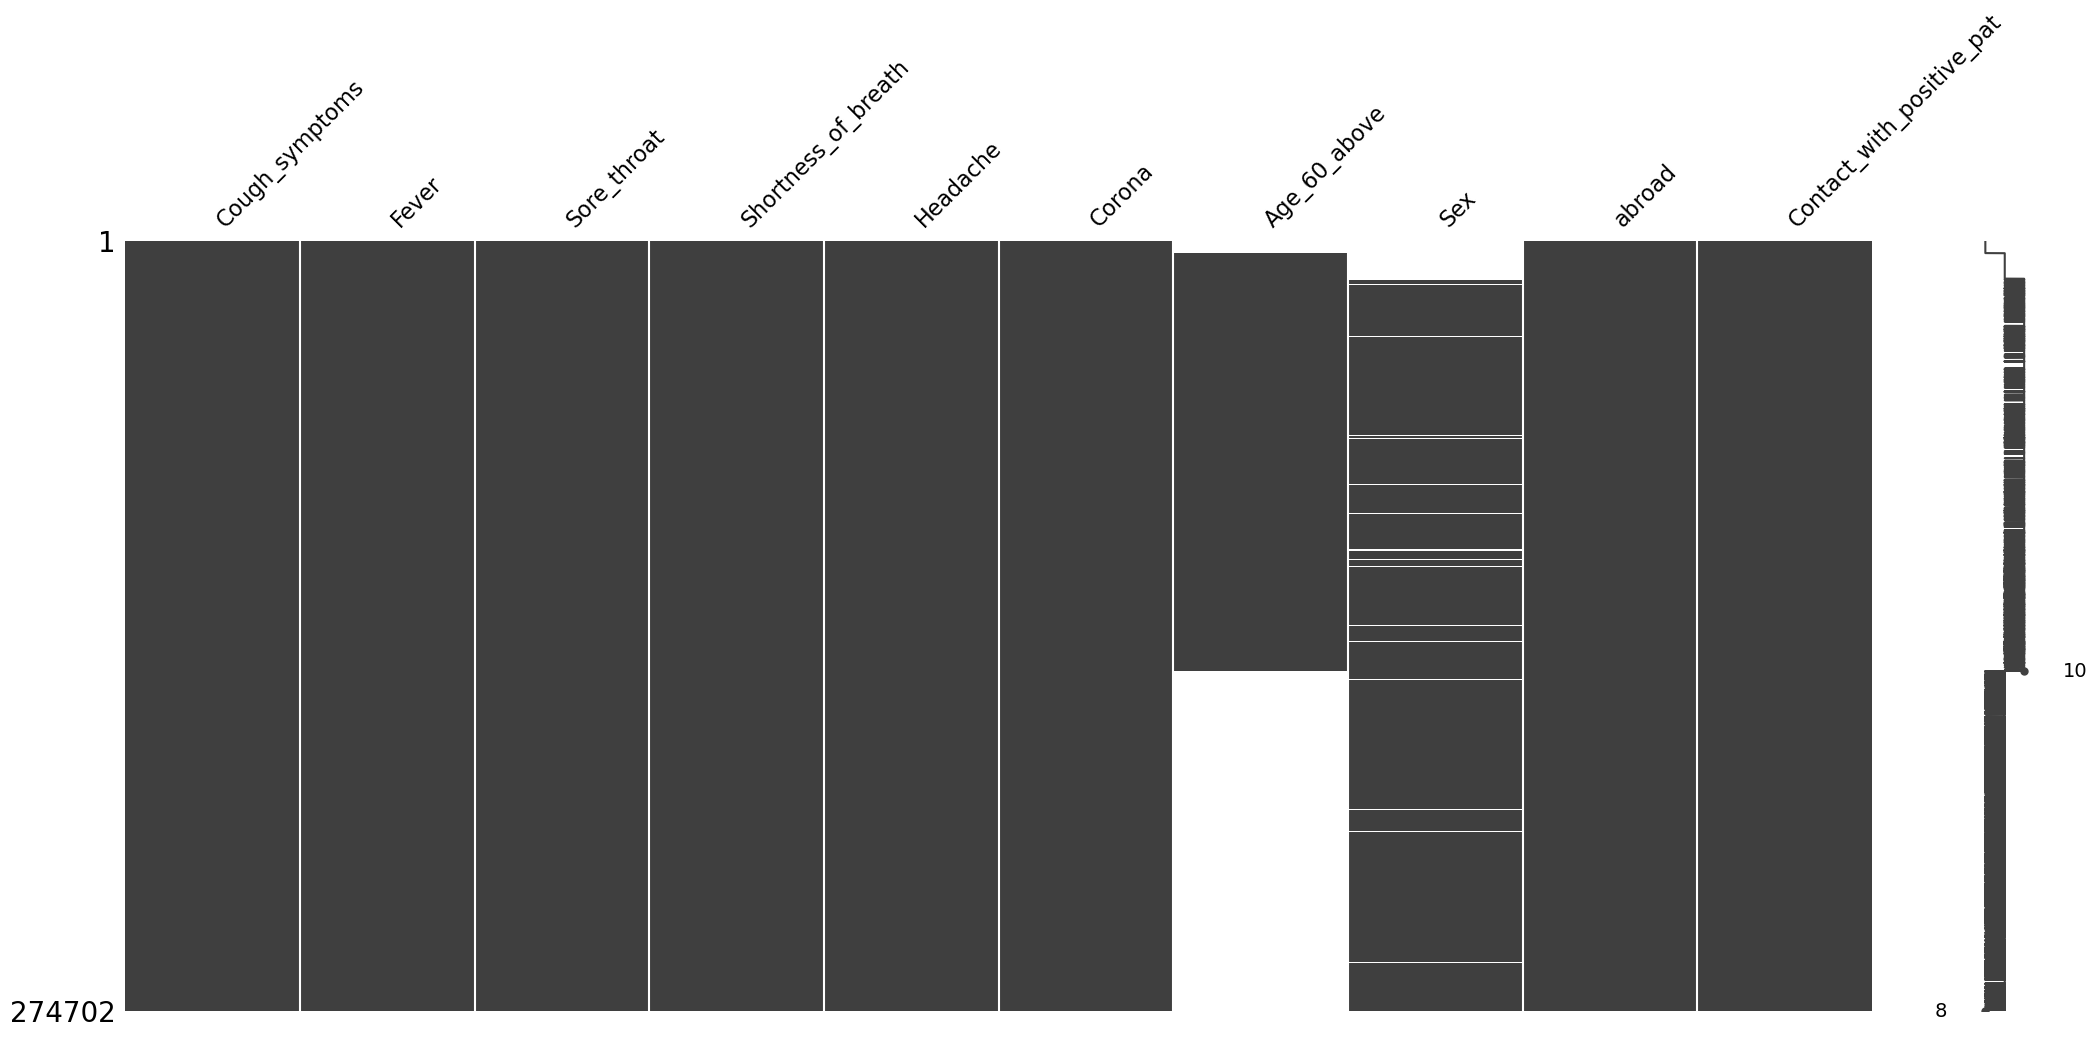

In [51]:
msno.matrix(data)

# these are missing at random

In [52]:
data['Age_60_above'].isnull().sum()

125659

In [53]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Cough_symptoms             274702 non-null  int64  
 1   Fever                      274702 non-null  int64  
 2   Sore_throat                274702 non-null  int64  
 3   Shortness_of_breath        274702 non-null  int64  
 4   Headache                   274702 non-null  int64  
 5   Corona                     274702 non-null  int64  
 6   Age_60_above               149043 non-null  float64
 7   Sex                        255668 non-null  float64
 8   abroad                     274702 non-null  uint8  
 9   Contact_with_positive_pat  274702 non-null  uint8  
dtypes: float64(2), int64(6), uint8(2)
memory usage: 19.4 MB


In [54]:
data.shape
data["Corona"].unique()

array([0, 1], dtype=int64)

In [55]:
from fancyimpute import IterativeImputer # importing MICE library
MICE_imputer = IterativeImputer() # calling MICE function
data_MICE = data.copy(deep=True) # creating copy
data_MICE.iloc[:, :] = MICE_imputer.fit_transform(data_MICE)

(CVXPY) Oct 06 10:29:06 AM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Oct 06 10:29:06 AM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Oct 06 10:29:06 AM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: The specified module could not be found.')


In [56]:
data_MICE

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,abroad,Contact_with_positive_pat
0,1.0,0.0,1.0,0.0,0.0,0.0,0.041683,0.437953,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.214869,0.630318,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.214869,0.630318,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.092968,0.529877,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.077293,0.470535,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
278843,0.0,0.0,0.0,0.0,0.0,1.0,0.238382,1.000000,0.0,0.0
278844,0.0,0.0,0.0,0.0,0.0,0.0,0.193454,0.000000,0.0,0.0
278845,0.0,0.0,0.0,0.0,0.0,0.0,0.161523,1.000000,0.0,0.0
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.161523,1.000000,0.0,0.0


In [57]:
# Define a function to map values
def map_values(value):
    if value < 0.5:
        return 0
    else:
        return 1

# Apply the mapping function to all columns
for column in data_MICE.columns:
    if column == 'Sex' or column =='Age_60_above':
        data_MICE[column] = data_MICE[column].apply(lambda x: map_values(x))
        


In [58]:
data_MICE.nunique()

Cough_symptoms               2
Fever                        2
Sore_throat                  2
Shortness_of_breath          2
Headache                     2
Corona                       2
Age_60_above                 2
Sex                          2
abroad                       2
Contact_with_positive_pat    2
dtype: int64

In [59]:
data_MICE.drop("Corona",axis = 1).corr()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,abroad,Contact_with_positive_pat
Cough_symptoms,1.000000,0.453797,0.115613,0.106330,0.116730,-0.007116,0.036173,0.525685,0.196275
Fever,0.453797,1.000000,0.122233,0.125840,0.169774,0.016315,0.042261,0.300116,0.180061
Sore_throat,0.115613,0.122233,1.000000,0.195181,0.323343,0.004504,-0.018248,0.031781,0.180226
Shortness_of_breath,0.106330,0.125840,0.195181,1.000000,0.202082,0.024065,0.006393,0.031248,0.138045
Headache,0.116730,0.169774,0.323343,0.202082,1.000000,0.008610,0.002009,0.018983,0.228591
Age_60_above,-0.007116,0.016315,0.004504,0.024065,0.008610,1.000000,-0.042819,-0.024606,0.007035
Sex,0.036173,0.042261,-0.018248,0.006393,0.002009,-0.042819,1.000000,0.037884,0.003313
abroad,0.525685,0.300116,0.031781,0.031248,0.018983,-0.024606,0.037884,1.000000,-0.063070
Contact_with_positive_pat,0.196275,0.180061,0.180226,0.138045,0.228591,0.007035,0.003313,-0.063070,1.000000


<AxesSubplot:>

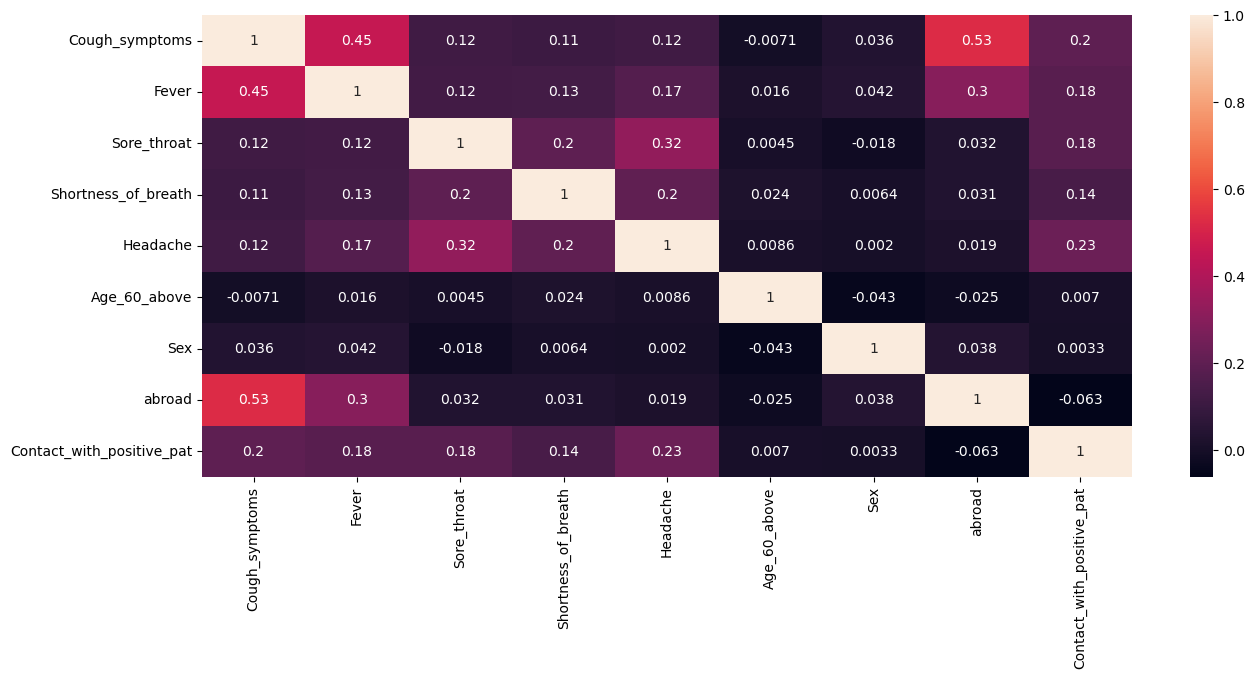

In [60]:
plt.figure(figsize=(15, 6))
sns.heatmap(data_MICE.drop("Corona",axis = 1).corr(),annot = True) #heatpmap of independent varibles to check if there is a correlation

### there is no or very less correlation between the varibales

In [61]:
X = data_MICE.drop("Corona",axis = 1)
y= data_MICE["Corona"]

In [62]:
y.unique()

array([0., 1.])

In [63]:
y

0         0.0
1         1.0
2         1.0
3         0.0
4         0.0
         ... 
278843    1.0
278844    0.0
278845    0.0
278846    0.0
278847    0.0
Name: Corona, Length: 274702, dtype: float64

In [64]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.385659
         Iterations 8
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    -0.848     
Dependent Variable:    Corona              AIC:                 211900.6155
Date:                  2023-10-06 10:29    BIC:                 211995.3265
No. Observations:      274702              Log-Likelihood:      -1.0594e+05
Df Model:              8                   LL-Null:             -57321.    
Df Residuals:          274693              LLR p-value:         1.0000     
Converged:             1.0000              Scale:               1.0000     
No. Iterations:        8.0000                                              
---------------------------------------------------------------------------
                           Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Cough_symptoms   

In [65]:
### random state train test split will be same with all people using random_state=16
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [66]:
X_train.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,abroad,Contact_with_positive_pat
181410,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
27548,0.0,1.0,0.0,0.0,0.0,0,0,0.0,0.0
233167,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0
73938,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
10158,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0


In [67]:
y_train.head()

181410    0.0
27548     0.0
233167    0.0
73938     0.0
10158     0.0
Name: Corona, dtype: float64

In [68]:
X_test.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,abroad,Contact_with_positive_pat
192471,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0
125076,1.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0
182268,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
243737,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
198907,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0


In [69]:
y_test

192471    0.0
125076    0.0
182268    0.0
243737    0.0
198907    0.0
         ... 
266411    0.0
274140    0.0
90175     0.0
27301     0.0
107575    0.0
Name: Corona, Length: 68676, dtype: float64

In [70]:
### both will have same shape
X_train.shape, y_train.shape

((206026, 9), (206026,))

In [71]:
### both will have same number of rows
X_test.shape, y_test.shape

((68676, 9), (68676,))

# Logistic reqression

In [72]:
### Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

In [73]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)

In [74]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [75]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [76]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[64427,   575],
       [ 1930,  1744]], dtype=int64)

In [77]:
### accuracy using accuracy_score
print(round(accuracy_score(y_test, logistic_reg_pred), 2))

0.96


In [78]:
print(round(precision_score(y_test, logistic_reg_pred), 2))

0.75


In [79]:
print(round(recall_score(y_test, logistic_reg_pred), 2))

0.47


In [80]:
from sklearn.metrics import f1_score
print(round(f1_score(y_test, logistic_reg_pred), 2))

0.58


In [82]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc

0.732920553995935